# Importing libraries

- It is also imported the py. file that contains the data MNIST

In [2]:
from load_mnist import load_mnist

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Matplotlib settings

In [4]:
# setting size for plotting with matplotlib
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
    
plt.rc('axes', labelsize = 8)    # fontsize of the x and y labels
plt.rc('xtick', labelsize = 6)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 6)    # fontsize of the tick labels
plt.rc('legend', fontsize= 6)     # legend fontsize
plt.rc('figure', titlesize = 10)  # fontsize of the figure title

## The variable "data" is a tuple containing the X and Y train and test inputs

In [5]:
data = load_mnist()

In [6]:
# assigning X, and Y
X_train = data[0]
Y_train = data[1]
X_test = data[2]
Y_test = data[3]

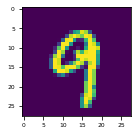

In [7]:
plt.figure(figsize=(2, 2))
plt.imshow(np.reshape(X_train[55555,:], [28,28]))

When adding more layers it is important that the elements in the weight matrices are `initialized` randomly. Initializing each element by sampling from $ N(0, \sigma^2) $. The offset vectors initialized with zeros.

In [8]:
# X_train.shape[1] # 784 features 
# Y_train.shape[1] # M classes
def initialize_parameters(X_tr, Y_tr):
    global costs, accuracies, W, b, dw, db
    costs = []
    accuracies = []
   # accuracy = 0
    dw = 0
    db = 0
    y_t = 0
    W = np.random.normal(0, 0.01, size=(X_tr.shape[1], Y_tr.shape[1]))
    b = np.zeros((1, Y_train.shape[1]))
    return costs, accuracies, dw, db, y_t, W, b

## Softmax Operation

In [10]:
def softmax(X_tr):
    global soft_max, W
    z = X_tr.dot(W) + b
    n = np.exp(z.T) # numerator (10,60000)
    d = np.sum(np.exp(z), axis=1) # denominator (60000,)
    soft_max = (n / d).T
    return soft_max

## Cost calculation

In [11]:
def cost_cal(soft_max,Y_tr):
    global costs
    cost = (-1 / Y_tr.shape[0]) * np.sum((Y_tr * np.log(soft_max)))
    costs.append(cost)
    return costs

## Gradient descent

In [12]:
def gradient(X_tr, Y_tr, soft_max):
    global W, b, dw, db
    n = Y_tr.shape[0]
    dw = (1 / n) * np.dot(X_tr.T, (soft_max - Y_tr))
    db = (1 / n) *  np.sum((soft_max - Y_tr),axis=0)
    W = W - l_r * dw
    b = b - l_r * db
    return W, b, dw, db

## Accuracy calculation

In [13]:
def accuracy_cal(soft_max, Y_tr):
    prediction = np.argmax(soft_max, axis=1)
    y_t = np.argmax(Y_tr,axis=1) # y_test is y_t
    accuracy = (prediction==y_t).mean()*100
    accuracies.append(accuracy)
    return accuracies

In [14]:
def slice_data():
    global X_tn, Y_tn
    ran_num = np.arange(X_train.shape[0]) # generate a vector X_train dimension
    np.random.shuffle(ran_num)             # shuffle the vector

    train_num = ran_num[:int(X_train.shape[0]*1)] # split the original train data 0.8 for the new train data and 0.2 for the new test data
    test_num = np.setdiff1d(ran_num, train_num) # slicing the index

    X_tn = X_train[train_num,:] # asigning new indices for X and Y, train and test, respectively
    Y_tn = Y_train[train_num,:]    

    return X_tn, Y_tn

## Mini-batch

In [119]:
def mini_batch(batch):
    global X_tr, Y_tr
    sample = np.random.randint(0, X_tn.shape[0], size=(batch))

    X_tr = X_train[sample]
    Y_tr = Y_train[sample]
    return X_tr, Y_tr

## Decreasing learning rate $lr = lr_0.e^{-k.i}$

In [16]:
def exp_decay(j, lrate):
    global l_r
    k=0.005
    l_r = lrate * np.exp(-k*j)
    return l_r

## Main Function "Logistic regression"

In [17]:
def regression_logi(x, y, learning_rate, num_iter, epoch, batch):
    X_train = x
    Y_train = y
    lrate = learning_rate # to avoid the decayin learning rate change lrate for l_r
    num_iter = num_iter # keep at 1 for mini batch
    epoch = epoch   # mumber of passes of the sample for the training dataset
    batch = batch   # ramdom sample for x and y
    epochs = []
    #slice_data()    # slice data the original training data
    mini_batch(batch) # create a sample for training data
    initialize_parameters(X_tr,Y_tr)    # initialize parameters based on the sample data and not for the whole training data

    for j in range(epoch):
        mini_batch(batch)
        exp_decay(j, lrate) # dont use this line for constant learning rate

        for i in range(num_iter):
            softmax(X_tr)
            accuracy_cal(soft_max, Y_tr)
            gradient(X_tr, Y_tr, soft_max)
            cost_cal(soft_max,Y_tr)
        epochs.append(j+1)
    return costs, accuracies, epochs, l_r

## Results for Train and Test data 

In [18]:
train_data = regression_logi(X_train, Y_train, 0.75, 1, 360, 1000) # number of epochs (# of training data points) / (batch) 

In [120]:
test_data = regression_logi(X_test, Y_test, 0.5, 1, 360, 500) # number of epochs (# of training data points) / (batch) 

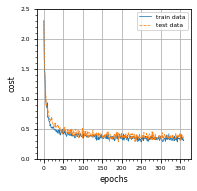

In [121]:
fig1 = plt.figure(figsize=cm2inch((7,7))) #7,7 for the report
ax = fig1.add_subplot()
ax.plot(train_data[0], linestyle='solid', linewidth=0.75, label="train data")
ax.plot(test_data[0], linestyle='dashed', linewidth=0.75, label="test data")
ax.set_xlabel("epochs")
ax.set_ylabel("cost")
ax.grid(b=bool)
ax.minorticks_on()
ax.legend(loc="upper right")
ax.set_ylim(0, 2.5)
#plt.savefig('cost2.jpg',bbox_inches='tight', dpi=300)
plt.show()

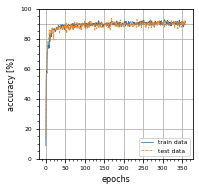

In [124]:
fig2 = plt.figure(figsize=cm2inch((7,7))) #7,7 for the report
ax = fig2.add_subplot()
ax.plot(train_data[1], linestyle='solid', linewidth=0.75, label="train data")
ax.plot(test_data[1], linestyle='dashed', linewidth=0.75, label="test data")
ynew = 90
ax.axhline(ynew, color='gray', linewidth=0.5)
ax.set_xlabel("epochs")
ax.set_ylabel("accuracy [%]")
ax.grid(b=bool)
ax.minorticks_on()
ax.legend(loc="lower right")
ax.set_ylim(0,100)
#plt.savefig('acc2.jpg',bbox_inches='tight', dpi=300)
plt.show()

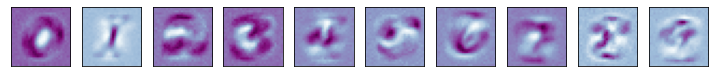

In [77]:
n = 10
plt.figure(figsize=(12.5, 10))
for i in range(n):
    ax = plt.subplot(1, 10, i+1)
    ax.imshow(W[:,i].reshape(28, 28), cmap="BuPu")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#plt.savefig('w2.jpg',bbox_inches='tight', dpi=300)

plt.show()

## Figure for a decreasing learning rate

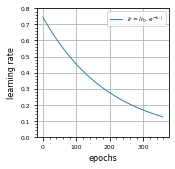

In [127]:
data_lr = []
lr_1 = 0.75
for j in range(1,360):
    k=0.005
    l_r2 = lr_1 * np.exp(-k*j)
    data_lr.append(l_r2)

fig3 = plt.figure(figsize=cm2inch((6,6))) #7,7 for the report
ax = fig3.add_subplot()
ax.plot(data_lr, linestyle='solid', linewidth=0.9, label=r'$lr = lr_0.e^{-k.i}$')
ax.set_xlabel("epochs")
ax.set_ylabel("learning rate")
ax.grid(b=bool)
ax.minorticks_on()
ax.legend(loc="upper right")
ax.set_ylim(0,0.8)

plt.savefig('exp_l_r.jpg',bbox_inches='tight', dpi=300)
plt.show()